In [4]:
import tensorflow as tf
import keras
keras.__version__


'2.3.0'

In [6]:
import pandas as pd

In [15]:
#white wine quality data
path="http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df=pd.read_csv(path,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
df.shape

(4898, 12)

In [16]:
from matplotlib import pyplot as plt

(array([ 37., 808., 969., 761., 765., 625., 427., 368., 110.,  28.]),
 array([ 8.  ,  8.62,  9.24,  9.86, 10.48, 11.1 , 11.72, 12.34, 12.96,
        13.58, 14.2 ]),
 <a list of 10 Patch objects>)

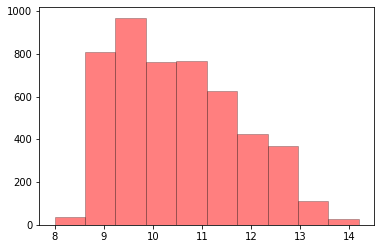

In [18]:
plt.hist(df.alcohol, 10, facecolor='red', ec="black", lw=0.5, alpha=0.5, label="White wine")

In [19]:
import numpy as np
print(np.histogram(df.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([   0,  317, 1606, 1256,  906,  675,  131,    7], dtype=int64), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


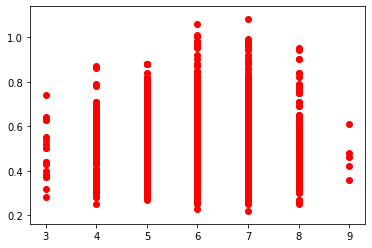

In [20]:
plt.scatter(df['quality'], df["sulphates"], color="red")

In [21]:
np.unique(df['quality'])

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
#red wine
df2=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
# Add `type` column to `red` with value 1
df2['type'] = 1

# Add `type` column to `white` with value 0
df['type'] = 0

# Append `white` to `red`
wines = df2.append(df, ignore_index=True)

In [25]:
wines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6370,6.8,0.27,0.30,13.00,0.047,69.0,160.0,0.99705,3.16,0.50,9.6,6,0
2695,6.5,0.28,0.26,8.80,0.040,44.0,139.0,0.99560,3.32,0.37,10.2,6,0
6442,5.6,0.34,0.25,2.50,0.046,47.0,182.0,0.99093,3.21,0.40,11.3,5,0
3384,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,0
1454,11.7,0.45,0.63,2.20,0.073,7.0,23.0,0.99974,3.21,0.69,10.9,6,1
4366,7.9,0.16,0.30,7.40,0.050,58.0,152.0,0.99612,3.12,0.37,9.5,6,0
3575,6.8,0.28,0.37,7.00,0.057,35.0,208.0,0.99730,3.57,0.55,10.2,5,0
4251,7.3,0.22,0.31,2.30,0.018,45.0,80.0,0.98936,3.06,0.34,12.9,7,0
5767,6.0,0.19,0.26,1.40,0.039,30.0,104.0,0.98998,3.32,0.41,12.4,6,0
4401,5.6,0.15,0.31,5.30,0.038,8.0,79.0,0.99230,3.30,0.39,10.5,6,0


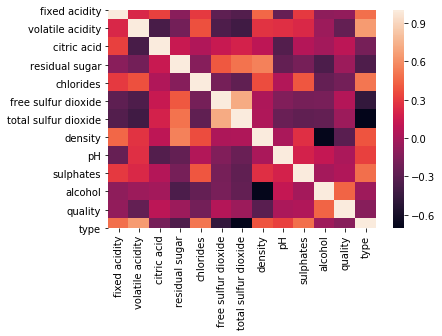

In [31]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
wines.shape

(6497, 13)

In [70]:
 #Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [71]:
X_train.shape

(4352, 11)

In [72]:
X_test.shape

(2145, 11)

In [38]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential


In [39]:
# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [40]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 3.43182743e-01,  2.76728272e-02, -2.48930156e-01,
         -3.25326324e-01, -4.02547091e-01, -2.58747518e-01,
         -2.58010566e-01, -9.89381969e-02,  4.08153415e-01,
          3.95313501e-02,  4.70279932e-01,  4.46684420e-01],
        [-3.88898492e-01, -4.45909917e-01, -4.16149288e-01,
          1.50571525e-01, -3.60931933e-01, -2.15427309e-01,
          2.18862653e-01,  3.14309716e-01, -4.43478107e-01,
         -9.51536000e-02, -3.86712193e-01, -4.41551179e-01],
        [ 2.88740039e-01, -1.36799544e-01, -7.74282813e-02,
         -4.40279126e-01,  4.85289335e-01,  1.07336402e-01,
          9.06913280e-02, -5.53810596e-03,  4.14652586e-01,
         -5.00601709e-01, -1.36804909e-01, -3.74217749e-01],
        [-1.53690606e-01, -1.87429577e-01,  1.71061575e-01,
         -9.77211893e-02,  3.79448771e-01, -5.04242241e-01,
          3.28201592e-01, -3.62083554e-01, -4.74689096e-01,
         -2.39729583e-01, -4.00458306e-01,  1.58301175e-01],
        [ 3.37035656e-01,  2.4254155

In [64]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0133 - accuracy: 0.9979
Epoch 2/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0105 - accuracy: 0.9977
Epoch 3/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0110 - accuracy: 0.9977
Epoch 4/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0110 - accuracy: 0.9979
Epoch 5/20
4352/4352 [==============================] - 11s 2ms/step - loss: 0.0109 - accuracy: 0.9977
Epoch 6/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0086 - accuracy: 0.9979
Epoch 7/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0103 - accuracy: 0.9982
Epoch 8/20
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0095 - accuracy: 0.9982
Epoch 9/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0088 - accuracy: 0.9982
Epoch 10/20
4352/4352 [==============================] - 9s 2ms/step - lo

In [73]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [74]:
y_pre = model.predict(X_test)

In [85]:
y_pred=np.round(y_pre)

In [81]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 125us/step
[0.03349009080597179, 0.9944055676460266]


In [86]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1585,    3],
       [   9,  548]], dtype=int64)

In [87]:
precision_score(y_test, y_pred)

0.9945553539019963

In [88]:
recall_score(y_test, y_pred)

0.9838420107719928

In [89]:
f1_score(y_test,y_pred)

0.9891696750902527

In [90]:
cohen_kappa_score(y_test, y_pred)

0.9853986111095354